# Example :  HMM using hmmlearn for State Sequence


In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from hmmlearn import hmm


## Generate data

In [2]:
mu1, sigma1 = 128, 64 # mean and standard deviation
mu2, sigma2 = 128, 8 # mean and standard deviation
mu3, sigma3 = 128, 32 # mean and standard deviation

reg1 = np.random.normal(mu1, sigma1, 512 )
reg2 = np.random.normal(mu2, sigma2, 512 )
reg3 = np.random.normal(mu3, sigma3, 512 )


mu4, sigma4 = 128, 32 # mean and standard deviation
reg4 = np.random.normal(mu4, sigma1, 512 )


In [3]:

reg1=reg1.reshape(reg1.shape[0],-1)
reg2=reg2.reshape(reg2.shape[0],-1)
reg3=reg3.reshape(reg3.shape[0],-1)

reg4=reg4.reshape(reg4.shape[0],-1)
tsteps = np.arange(0,511)

In [4]:
X = np.vstack([reg1, reg2, reg3])

In [5]:
X.shape

(1536, 1)

In [6]:
lengths = [len(reg1), len(reg2), len(reg3)]

In [7]:
X_test = reg4

In [8]:
X_test.shape

(512, 1)

## Train model

In [9]:
model = hmm.GMMHMM(n_components=5, covariance_type="full", n_iter=100, random_state=1)

model.fit(X, lengths)

GMMHMM(algorithm='viterbi', covariance_type='full',
    covars_prior=array([[[[0.]]],


       [[[0.]]],


       [[[0.]]],


       [[[0.]]],


       [[[0.]]]]),
    covars_weight=array([[-3.],
       [-3.],
       [-3.],
       [-3.],
       [-3.]]),
    init_params='stmcw',
    means_prior=array([[[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]]]),
    means_weight=array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]]),
    min_covar=0.001, n_components=5, n_iter=100, n_mix=1, params='stmcw',
    random_state=1, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
    verbose=False,
    weights_prior=array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]]))

## Predict best State Sequence for Observations using the model 

In [10]:
Z_test = model.predict(X_test)
model.monitor_

ConvergenceMonitor(
    history=[-7771.919535248161, -7795.621646705622],
    iter=3,
    n_iter=100,
    tol=0.01,
    verbose=False,
)

In [11]:
#Find most likely state sequence corresponding to X_test using Viterbi Algorithm

In [12]:
model.decode(X_test)

(-3504.8748970326624,
 array([1, 2, 2, 4, 0, 1, 3, 0, 4, 4, 3, 1, 0, 0, 0, 0, 0, 4, 2, 2, 2, 2,
        2, 2, 2, 2, 4, 0, 4, 2, 1, 2, 1, 1, 3, 3, 3, 4, 3, 1, 2, 2, 2, 1,
        4, 4, 0, 0, 4, 4, 1, 3, 0, 0, 3, 0, 3, 2, 0, 3, 0, 0, 0, 0, 0, 1,
        3, 0, 3, 0, 4, 3, 1, 1, 2, 1, 0, 0, 0, 4, 0, 2, 1, 0, 3, 0, 3, 0,
        4, 4, 3, 3, 4, 3, 0, 2, 1, 2, 0, 0, 3, 4, 0, 3, 0, 3, 4, 2, 2, 2,
        2, 1, 3, 0, 0, 3, 1, 3, 4, 3, 3, 1, 1, 1, 3, 0, 0, 0, 4, 0, 0, 3,
        0, 0, 2, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 3, 1, 2, 2, 2, 1, 3, 4, 0,
        4, 0, 0, 0, 2, 0, 4, 3, 4, 0, 4, 1, 2, 2, 1, 1, 2, 1, 0, 3, 1, 3,
        1, 0, 0, 4, 2, 3, 4, 1, 0, 0, 0, 0, 3, 0, 4, 0, 4, 0, 3, 1, 0, 0,
        3, 1, 3, 0, 0, 0, 0, 4, 0, 0, 0, 1, 3, 0, 2, 1, 3, 0, 0, 0, 0, 0,
        0, 4, 0, 4, 3, 4, 3, 4, 0, 0, 0, 0, 4, 0, 3, 4, 4, 2, 2, 2, 1, 3,
        0, 0, 4, 1, 3, 4, 2, 0, 4, 0, 0, 1, 3, 0, 1, 3, 3, 0, 0, 0, 0, 3,
        0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 4, 4, 4, 3, 1, 0, 0, 0, 3, 0, 4, 0,
        0, 3, 0,

In [13]:
model.transmat_

array([[0.40243655, 0.06605153, 0.04966562, 0.22439934, 0.25744696],
       [0.23015444, 0.18636594, 0.14575993, 0.24806729, 0.18965241],
       [0.21847578, 0.15192755, 0.221661  , 0.20227292, 0.20566274],
       [0.34590827, 0.10099421, 0.08003301, 0.21860135, 0.25446316],
       [0.36778401, 0.08239018, 0.06553092, 0.24122249, 0.24307239]])

In [14]:
model.predict_proba(X_test)


array([[0.04251784, 0.44503121, 0.10363417, 0.37586575, 0.03295103],
       [0.19852337, 0.13981622, 0.25577922, 0.2845906 , 0.12129059],
       [0.00104208, 0.0957937 , 0.73124816, 0.17039681, 0.00151924],
       ...,
       [0.3642805 , 0.08134394, 0.10842175, 0.25316772, 0.19278609],
       [0.19506107, 0.07687616, 0.17778223, 0.46397166, 0.08630888],
       [0.31606268, 0.12912016, 0.07441211, 0.13202963, 0.34837542]])

## Plot of Observations and state sequence 

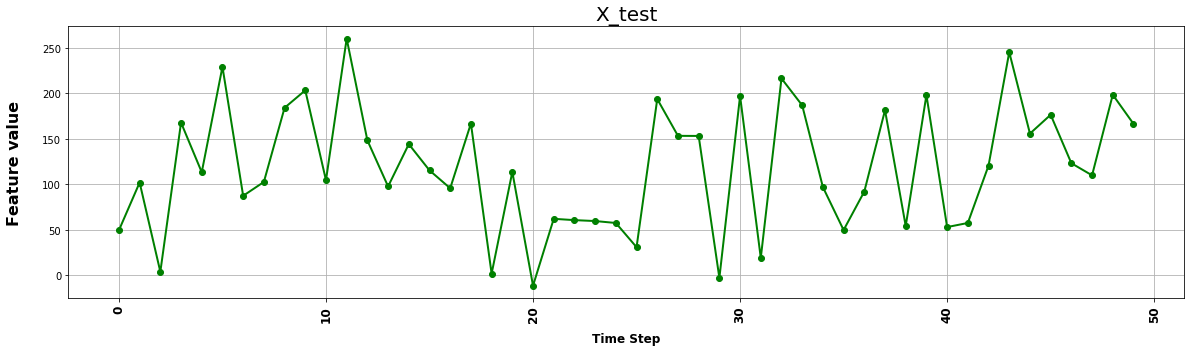

In [15]:

fig, ax = plt.subplots(figsize=(20,5))
plt.plot(tsteps[0:50],X_test[0:50], 'go-', linewidth=2)
plt.xticks(rotation=90, size=12, weight='bold')
plt.xlabel('Time Step',labelpad=10, weight='bold',size=12)
plt.ylabel('Feature value', labelpad=20, weight='bold', size=16)
plt.grid()
plt.title('X_test', size=20)
plt.show()

## Plot of Observations and state sequence 

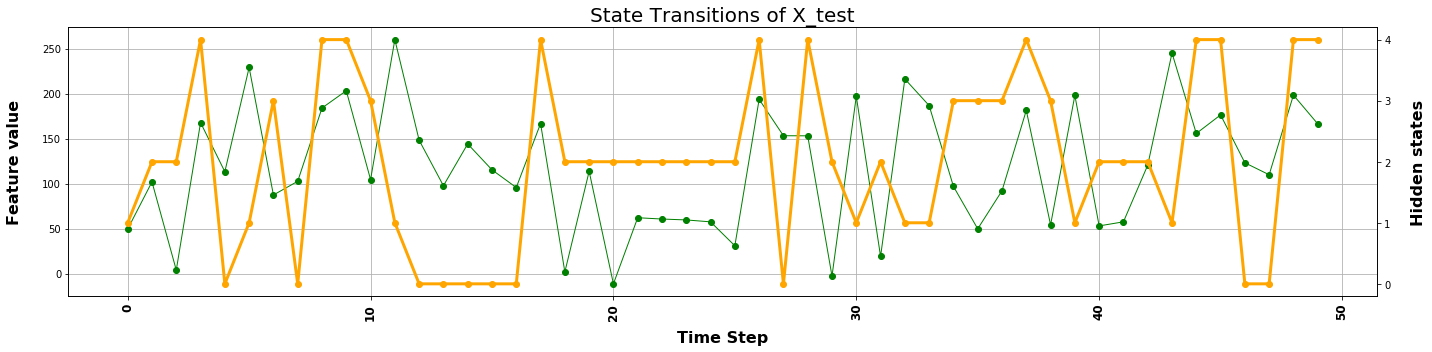

In [16]:
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(tsteps[0:50],X_test[0:50,0], 'go-', linewidth=1)
plt.xticks(rotation=90, size=12, weight='bold')
plt.xlabel('Time Step',labelpad=10, weight='bold',size=16)
plt.ylabel('Feature value', labelpad=20, weight='bold', size=16)

plt.grid()
plt.title('State Transitions of X_test', size=20)
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Hidden states', labelpad=20, weight='bold', size=16) 
ax2.plot(tsteps[0:50], Z_test[0:50], 'o-', color='orange',linewidth=3)
ax2.tick_params(axis='y')
plt.locator_params(axis='y', nbins=5)
fig.tight_layout()  
plt.show()

In [17]:
#State-membership probabilities for each sample in X_test

In [18]:
model.score_samples(X_test)

(-3084.225564256308,
 array([[0.04251784, 0.44503121, 0.10363417, 0.37586575, 0.03295103],
        [0.19852337, 0.13981622, 0.25577922, 0.2845906 , 0.12129059],
        [0.00104208, 0.0957937 , 0.73124816, 0.17039681, 0.00151924],
        ...,
        [0.3642805 , 0.08134394, 0.10842175, 0.25316772, 0.19278609],
        [0.19506107, 0.07687616, 0.17778223, 0.46397166, 0.08630888],
        [0.31606268, 0.12912016, 0.07441211, 0.13202963, 0.34837542]]))

In [19]:
#logprob – Log likelihood of X_test.

In [20]:
model.score(X_test)

-3084.225564256308